## 1.5.2 Harris Corner Detection

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
filename = 'sim1.png'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

In [3]:
#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

In [6]:
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[255,0,0]

(Text(0.5,1,'img'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

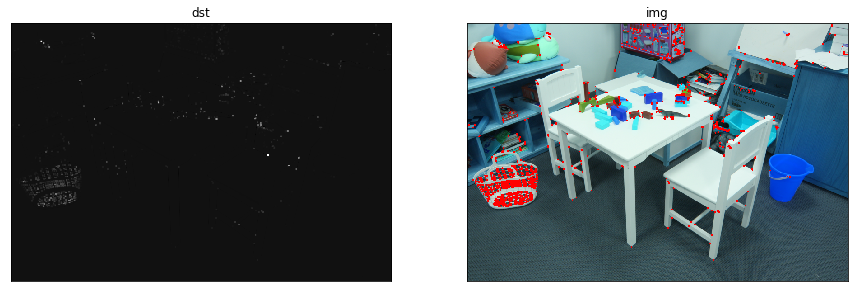

In [7]:
plt.figure(figsize=(15,10))
plt.subplot(121),plt.imshow(dst,cmap = 'gray')
plt.title('dst'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img, cmap='gray')
plt.title('img'), plt.xticks([]), plt.yticks([])

## with trackbar

In [8]:
def nothing(x):
    pass

In [11]:
cv2.namedWindow('image')
cv2.createTrackbar('threshold', 'image', 10, 100, nothing)
while(1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    threshold = cv2.getTrackbarPos('threshold', 'image')
    if(threshold <= 1):
        threshold = 1
    img = cv2.imread(filename)
    img[dst>1./threshold*dst.max()]=[0,0,255]
    cv2.imshow('image',img)
cv2.destroyAllWindows()

## Corner with SubPixel Accuracy

In [12]:
filename = 'horse-beach.bmp'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [13]:
# find Harris corners
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)

In [14]:
# find centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

In [15]:
# define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

In [16]:
# Now draw them
res = np.hstack((centroids,corners))
res = np.int0(res)
img[res[:,1],res[:,0]]=[0,0,255]
img[res[:,3],res[:,2]] = [0,255,0]
cv2.imwrite('subpixel5.png',img)

True

In [17]:
img = cv2.imread(filename)
oimg = cv2.imread(filename)
img[res[:,1],res[:,0]]=[0,0,255]
img[res[:,3],res[:,2]] = [0,255,0]

In [18]:
for i in range(res.shape[0]):
    cv2.circle(img,(res[i,0],res[i,1]),3,(255,0,0),-1)
    cv2.circle(oimg,(res[i,2],res[i,3]),3,(0,255,0),-1)

(Text(0.5,1,'oimg'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

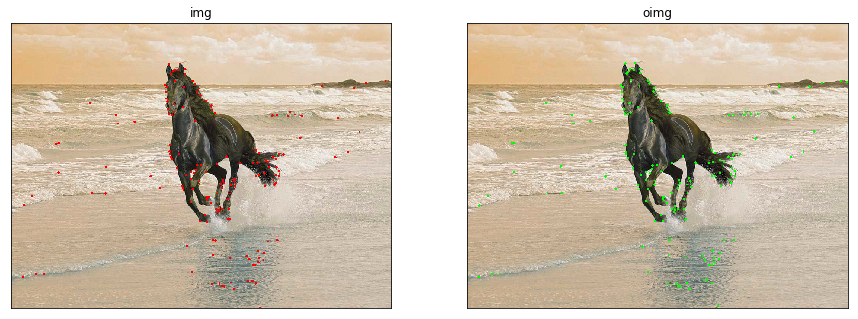

In [19]:
plt.figure(figsize=(15,10))
plt.subplot(121),plt.imshow(img)
plt.title('img'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(oimg)
plt.title('oimg'), plt.xticks([]), plt.yticks([])

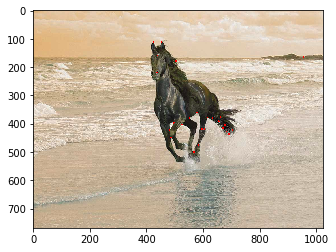

(<matplotlib.image.AxesImage at 0x22370beccc0>, None)

In [20]:
img = cv2.imread('horse-beach.bmp')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,255,-1)
plt.imshow(img),plt.show()